This code implements the cnn with tensorflow

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# run session
sess = tf.InteractiveSession()

# Define parameters

In [2]:
size_image = 28 # image size
dim_fe = size_image*size_image # dim of feature 
n_class = 10 # number of classes
size_batch = 50 # batch size

class param_conv1:
    patch_size = 5
    n_input_channels = 1
    n_output_channels = 32
class param_conv2:
    patch_size = 5
    n_input_channels = 32
    n_output_channels = 64    
class param_fc1:
    image_size = 7
    n_neurons = 1024
    n_output_channels = 64

# get dataset 

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# Variable definition

In [4]:
x = tf.placeholder(dtype=tf.float32, shape=[None,dim_fe], name='x')
y_ = tf.placeholder(dtype=tf.float32, shape=[None,n_class], name='y_')
keep_prob = tf.placeholder(dtype=tf.float32, name='keep_prob')
print 'x\'s shape:', x.get_shape()
print 'y_\'s shape:', y_.get_shape()


x's shape: (?, 784)
y_'s shape: (?, 10)


# Define layers
define functions

In [5]:
# variables
def weight_variable(shape):    
    return tf.Variable(tf.truncated_normal(shape=shape,mean=0.,stddev=0.1))
def bias_variable(shape):
    return tf.Variable(tf.constant(value=0.1,dtype=tf.float32,shape=shape))
# operations
def conv2d(x, W):
    return tf.nn.conv2d(input=x, filter=W, strides=[1,1,1,1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

define first conv layer

In [6]:
# variables
W_conv1 = weight_variable(
    shape=[param_conv1.patch_size, param_conv1.patch_size, 
           param_conv1.n_input_channels, param_conv1.n_output_channels])
b_conv1 = bias_variable(
    shape=[param_conv1.n_output_channels])
print 'W_conv1\'s shape:', W_conv1.get_shape()
print 'b_conv1\'s shape:', b_conv1.get_shape()

# reshape input image
print 'x\'s shape:', x.get_shape()
x_image = tf.reshape(tensor=x,shape=[-1,size_image,size_image,1])
print 'x_image\'s shape:', x_image.get_shape()

# outputs
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1)+b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
print 'h_conv1\'s shape:', h_conv1.get_shape()
print 'h_pool1\'s shape:', h_pool1.get_shape()


W_conv1's shape: (5, 5, 1, 32)
b_conv1's shape: (32,)
x's shape: (?, 784)
x_image's shape: (?, 28, 28, 1)
h_conv1's shape: (?, 28, 28, 32)
h_pool1's shape: (?, 14, 14, 32)


define second conv layer

In [7]:
# variables
W_conv2 = weight_variable(
    shape=[param_conv2.patch_size, param_conv2.patch_size, 
           param_conv2.n_input_channels, param_conv2.n_output_channels])
b_conv2 = bias_variable(
    shape=[param_conv2.n_output_channels])
print 'W_conv2\'s shape:', W_conv2.get_shape()
print 'b_conv2\'s shape:', b_conv2.get_shape()

# outputs
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2)+b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
print 'h_conv2\'s shape:', h_conv2.get_shape()
print 'h_pool2\'s shape:', h_pool2.get_shape()


W_conv2's shape: (5, 5, 32, 64)
b_conv2's shape: (64,)
h_conv2's shape: (?, 14, 14, 64)
h_pool2's shape: (?, 7, 7, 64)


define fc1 layer

In [8]:
n_weights = int(h_pool2.get_shape()[1]*h_pool2.get_shape()[2]*h_pool2.get_shape()[3])
print n_weights
W_fc1 = weight_variable([n_weights,param_fc1.n_neurons])
b_fc1 = bias_variable([param_fc1.n_neurons])
print 'W_fc1\'s shape:', W_fc1.get_shape()
print 'b_fc1\'s shape:', b_fc1.get_shape()

# flat h_pool2
h_pool2_flat = tf.reshape(h_pool2,shape=[-1,n_weights])
print 'h_pool2_flat\'s shape:', h_pool2_flat.get_shape()

# get h_fc1
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
print 'h_fc1\'s shape:', h_fc1.get_shape()

3136
W_fc1's shape: (3136, 1024)
b_fc1's shape: (1024,)
h_pool2_flat's shape: (?, 3136)
h_fc1's shape: (?, 1024)


drop out

In [9]:
h_fc1_drop = tf.nn.dropout(h_fc1,keep_prob=keep_prob)
print 'h_fc1_drop\'s shape:', h_fc1_drop.get_shape()

h_fc1_drop's shape: (?, 1024)


define fc1

In [10]:
W_fc2 = weight_variable([int(h_fc1.get_shape()[1]),n_class])
b_fc2 = bias_variable([n_class])
print 'W_fc2\'s shape:', W_fc2.get_shape()
print 'b_fc2\'s shape:', b_fc2.get_shape()

# # flat h_pool2
# h_pool2_flat = tf.reshape(h_pool2,shape=[-1,n_weights])
# print 'h_pool2_flat\'s shape:', h_pool2_flat.get_shape()

# get h_fc2
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
print 'y_conv\'s shape:', y_conv.get_shape()

W_fc2's shape: (1024, 10)
b_fc2's shape: (10,)
y_conv's shape: (?, 10)


# Define loss

In [11]:
cross_entropy = tf.reduce_mean(
    input_tensor=-tf.reduce_sum(input_tensor=y_*tf.log(y_conv), reduction_indices=[1]))


# Define eval model

In [12]:
correct_prediction = tf.equal(tf.argmax(y_conv,dimension=1), tf.argmax(y_,dimension=1))
accuracy = tf.reduce_mean(input_tensor=tf.cast(correct_prediction, dtype=tf.float32))

# Train model

0 0.18
50 0.68
100 0.78
150 0.92
200 0.94
250 0.92
300 0.86
350 0.92
400 0.98
450 0.9
500 0.94
550 0.96
600 0.98
650 0.96
700 0.96
750 0.94
800 0.96
850 0.98
900 0.96
950 0.98


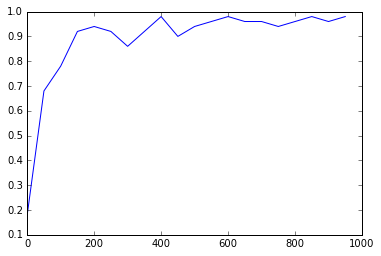

In [14]:
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss=cross_entropy)

# initialize
sess.run(tf.initialize_all_variables())

# training
x_axis = []
err_train = []
err_test = []
for i in range(1000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    # draw error line
    if i%50 == 0:
        x_axis.append(i)
        train_accu = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
#         test_accu = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        err_train.append(train_accu)
#         err_test.append(test_accu)
        print i, train_accu
    
# plot
plt.plot(x_axis, err_train)
# plt.plot(x_axis, err_test)
    


# eval

In [1]:
print accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})


NameError: name 'accuracy' is not defined